In [4]:
import pandas as pd
from collections import Counter

In [5]:
df = pd.read_csv('Isomerisation.csv')
df.columns

Index(['Entry', 'SM-SMILES', 'catalyst', 'Temperature', 'Solvent',
       'Product-SMILES', 'Yield ', 'Comment'],
      dtype='object')

In [6]:
df

,Entry,SM-SMILES,catalyst,Temperature,Solvent,Product-SMILES,Yield,Comment
0,1,CC1(C)C=C1C(O)C2=CC=CC=C2,PtBr2,70 °C,"1,2-DCE",OC(C1=CC=CC=C1)C(C(C)=C)=C,50%,NaN
1,2,CC1(C)C=C1C(C2=CC=CC=C2)(C)O,PtBr2,70 °C,"1,2-DCE",OC(C1=CC=CC=C1)(C)C(C(C)=C)=C,<5%,NaN
2,3,CC1(C)C=C1C(O)(C)C,PtBr2,70 °C,"1,2-DCE",CC(C(C(O)(C)C)=C)=C,32%,NaN
3,4,CC1(C)C=C1C(CCCCC)O,PtBr2,70 °C,"1,2-DCE",OC(CCCCC)C(C(C)=C)=C,37%,NaN
4,5,CC1(C)C=C1C(C2=CC=C(OC)C=C2)O,PtBr2,70 °C,"1,2-DCE",OC(C1=CC=C(OC)C=C1)C(C(C)=C)=C,50%,NaN
5,6,CC1(C)C=C1C(C2=CC=C(Br)C=C2)O,PtBr2,70 °C,"1,2-DCE",OC(C1=CC=C(Br)C=C1)C(C(C)=C)=C,62%,NaN
6,7,CC1(C)C=C1C2(O)CCC3(OCCO3)CC2,PtBr2,70 °C,"1,2-DCE",OC1(CCC2(OCCO2)CC1)C(C(C)=C)=C,65%,NaN
7,8,CC1(C)C=C1C2(O)CCN(C(OC(C)(C)C)=O)CC2,PtBr2,70 °C,"1,2-DCE",O=C(OC(C)(C)C)N(CC1)CCC1(O)C(C(C)=C)=C,68%,NaN
8,9,CC1(C)C(C)=C1C(O)C2=CC=CC=C2,PtBr2,70 °C,"1,2-DCE",OC(C1=CC=CC=C1)/C(C(C)=C)=C\C,<5%,NaN
9,10,CC1(C(OCC)=O)C=C1C2=CC=CC=C2,PtBr2,70 °C,"1,2-DCE",C=C(C1=CC=CC=C1)C(C(OCC)=O)=C,<5%,NaN


In [7]:
subset = df[df['SM-SMILES'] != 'CC1(C(C(O)C2=CSC=C2)=C1)C']

/tmp/ipykernel_3064330/4227541666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['yield'] = subset['Yield '].apply(lambda x: x.replace('%', '').replace('<', '')).astype(float)


16

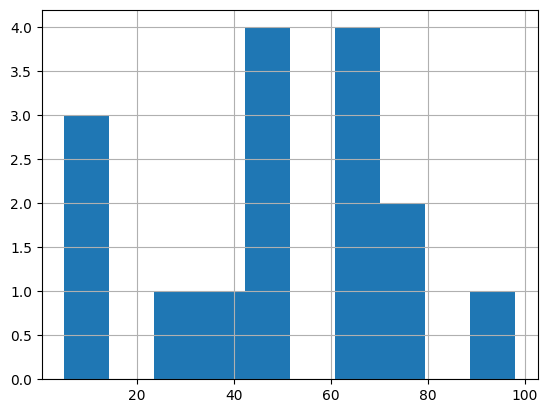

In [8]:
subset['yield'] = subset['Yield '].apply(lambda x: x.replace('%', '').replace('<', '')).astype(float)
subset['yield'].hist()
len(subset)

In [9]:
reaction_strings = []

for i, row in subset.iterrows():
    reaction_strings.append(f"the isomerization from {row['SM-SMILES']} to {row['Product-SMILES']}")

subset['reaction'] = reaction_strings


/tmp/ipykernel_3064330/553686189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['reaction'] = reaction_strings


In [10]:
subset['yield_bin'] = (subset['yield'] > 50).astype(int)

/tmp/ipykernel_3064330/1267329960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['yield_bin'] = (subset['yield'] > 50).astype(int)


In [11]:
Counter(subset['yield_bin'])

Counter({0: 8, 1: 8})

In [12]:
subset

,Entry,SM-SMILES,catalyst,Temperature,Solvent,Product-SMILES,Yield,Comment,yield,reaction,yield_bin
0,1,CC1(C)C=C1C(O)C2=CC=CC=C2,PtBr2,70 °C,"1,2-DCE",OC(C1=CC=CC=C1)C(C(C)=C)=C,50%,NaN,50.0,the isomerization from CC1(C)C=C1C(O)C2=CC=CC=...,0
1,2,CC1(C)C=C1C(C2=CC=CC=C2)(C)O,PtBr2,70 °C,"1,2-DCE",OC(C1=CC=CC=C1)(C)C(C(C)=C)=C,<5%,NaN,5.0,the isomerization from CC1(C)C=C1C(C2=CC=CC=C2...,0
2,3,CC1(C)C=C1C(O)(C)C,PtBr2,70 °C,"1,2-DCE",CC(C(C(O)(C)C)=C)=C,32%,NaN,32.0,the isomerization from CC1(C)C=C1C(O)(C)C to C...,0
3,4,CC1(C)C=C1C(CCCCC)O,PtBr2,70 °C,"1,2-DCE",OC(CCCCC)C(C(C)=C)=C,37%,NaN,37.0,the isomerization from CC1(C)C=C1C(CCCCC)O to ...,0
4,5,CC1(C)C=C1C(C2=CC=C(OC)C=C2)O,PtBr2,70 °C,"1,2-DCE",OC(C1=CC=C(OC)C=C1)C(C(C)=C)=C,50%,NaN,50.0,the isomerization from CC1(C)C=C1C(C2=CC=C(OC)...,0
5,6,CC1(C)C=C1C(C2=CC=C(Br)C=C2)O,PtBr2,70 °C,"1,2-DCE",OC(C1=CC=C(Br)C=C1)C(C(C)=C)=C,62%,NaN,62.0,the isomerization from CC1(C)C=C1C(C2=CC=C(Br)...,1
6,7,CC1(C)C=C1C2(O)CCC3(OCCO3)CC2,PtBr2,70 °C,"1,2-DCE",OC1(CCC2(OCCO2)CC1)C(C(C)=C)=C,65%,NaN,65.0,the isomerization from CC1(C)C=C1C2(O)CCC3(OCC...,1
7,8,CC1(C)C=C1C2(O)CCN(C(OC(C)(C)C)=O)CC2,PtBr2,70 °C,"1,2-DCE",O=C(OC(C)(C)C)N(CC1)CCC1(O)C(C(C)=C)=C,68%,NaN,68.0,the isomerization from CC1(C)C=C1C2(O)CCN(C(OC...,1
8,9,CC1(C)C(C)=C1C(O)C2=CC=CC=C2,PtBr2,70 °C,"1,2-DCE",OC(C1=CC=CC=C1)/C(C(C)=C)=C\C,<5%,NaN,5.0,the isomerization from CC1(C)C(C)=C1C(O)C2=CC=...,0
9,10,CC1(C(OCC)=O)C=C1C2=CC=CC=C2,PtBr2,70 °C,"1,2-DCE",C=C(C1=CC=CC=C1)C(C(OCC)=O)=C,<5%,NaN,5.0,the isomerization from CC1(C(OCC)=O)C=C1C2=CC=...,0


In [13]:
subset.to_csv('Isomerisation_train.csv')

50.5


<AxesSubplot: >

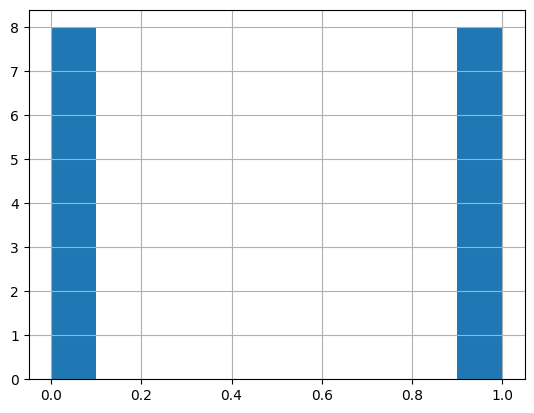

In [14]:
print(subset['yield'].median())
subset['yield_bin'].hist()